# 1. Data import and Understanding

# A. Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [72]:
import numpy as np
import pandas as pd
import h5py     
import seaborn as sns 
from sklearn import preprocessing
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras import optimizers
import numpy as np
import pandas as pd
import h5py     
import seaborn as sns 
from sklearn import preprocessing
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [73]:
import tensorflow as tf
print(tf.__version__)

2.13.0-rc1


In [74]:
signal=pd.read_csv('Signal.csv') 

# Multi-level classification (data used for classification : numerical)

In [75]:
signal.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# B. Check for missing values and print percentage for each attribute.


In [76]:
signal.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [77]:
(signal.isnull().sum()/len(signal)*100)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

In [78]:
signal.shape

(1599, 12)

In [79]:
len(signal['Signal_Strength'].value_counts())

6

In [80]:
signal['Signal_Strength'].value_counts()  #RD ( from 3 to 8 )

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

# C. Check for presence of duplicate records in the dataset and impute with appropriate method.

In [81]:
signal.duplicated().any() 

True

In [82]:
signal.shape

(1599, 12)

In [83]:
# Total duplicate Records in the dataset

Duplicates=signal[signal.duplicated(subset=None, keep=False)]  #RD 
Duplicates.shape 

(460, 12)

In [84]:
# After Keeping single copy of all duplicate records from dataset 

Duplicates=signal[signal.duplicated(subset=None, keep='first')]  #RD 
Duplicates.shape

(240, 12)

In [85]:
Duplicates.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5


In [86]:
#After droping all the duplicates except by retaining single record of all the duplicate rows 

signal_clean=signal.drop_duplicates(subset=None, keep='first')   #RD 
signal_clean.shape

(1359, 12)

In [87]:
# Verified 

(1599-240)    

1359

In [88]:
signal_clean.columns

Index(['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11', 'Signal_Strength'],
      dtype='object')

# D. Visualise distribution of the target variable.

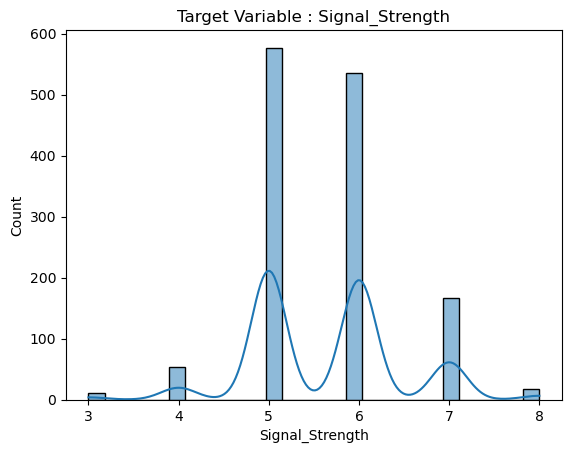

In [89]:
sns.histplot(signal_clean['Signal_Strength'],kde=True)
plt.title('Target Variable : Signal_Strength')
signal_clean['Signal_Strength'].value_counts()
plt.show()

In [90]:
signal_clean['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

# E. Share insights from the initial data analysis (at least 2).

In [91]:
# 1) There were no 'null values' in the dataset, but there were some i.e 240 duplicate 
# records, have dropped all the duplicate records by keeping single copy of each records.

# 2) After dropping duplicate records the new shape of data set is (1359, 12).

# 3) The target variable has 6 disticnt values. Out of which 2 distinct class i.e (5 And 6)
#    has the majority of target variable.

# 4) Out of all the independent variables or predictors ,'Parameter 7' has wide range of 
#    values i.e min value is 6 and max value is 289.

# 5) Except Parameters 4 ,5 and 9 all the other variables are almost Normally distributed.

In [92]:
# Distribution of all numerical variables With respective skew values.

In [93]:
for i in range(0,len(signal_clean.columns)):
    skewness=signal_clean[signal_clean.columns[i]].skew()
    print(f'Variable => {signal_clean.columns[i]} has a skewness of : {skewness}')  

Variable => Parameter 1 has a skewness of : 0.9410413664561449
Variable => Parameter 2 has a skewness of : 0.7292789463991854
Variable => Parameter 3 has a skewness of : 0.31272554238899036
Variable => Parameter 4 has a skewness of : 4.548153403940447
Variable => Parameter 5 has a skewness of : 5.502487294623722
Variable => Parameter 6 has a skewness of : 1.2265794991760643
Variable => Parameter 7 has a skewness of : 1.5403680777213933
Variable => Parameter 8 has a skewness of : 0.04477785573116107
Variable => Parameter 9 has a skewness of : 0.2320322752014824
Variable => Parameter 10 has a skewness of : 2.4065046145674196
Variable => Parameter 11 has a skewness of : 0.8598411692319623
Variable => Signal_Strength has a skewness of : 0.19240658731658308


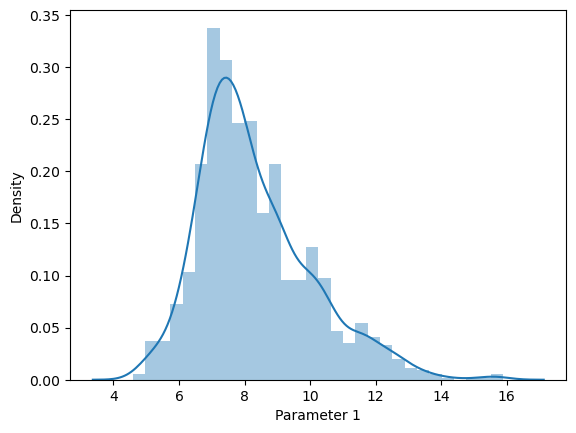

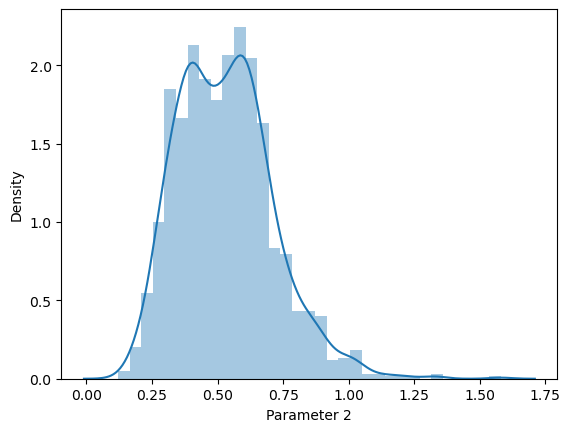

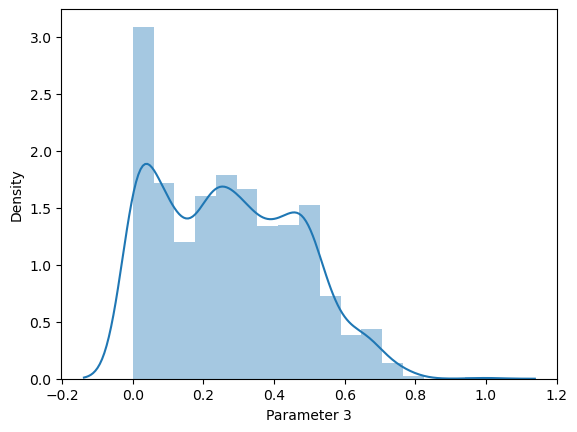

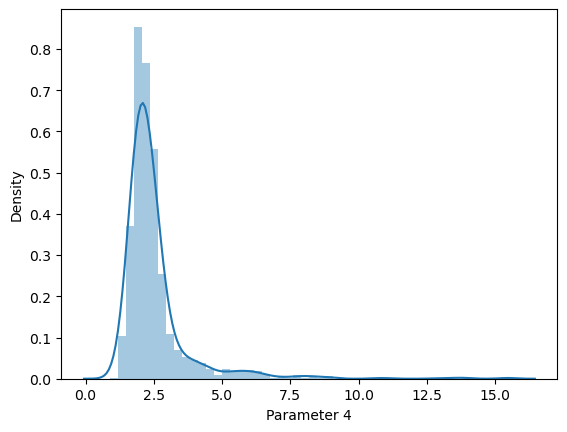

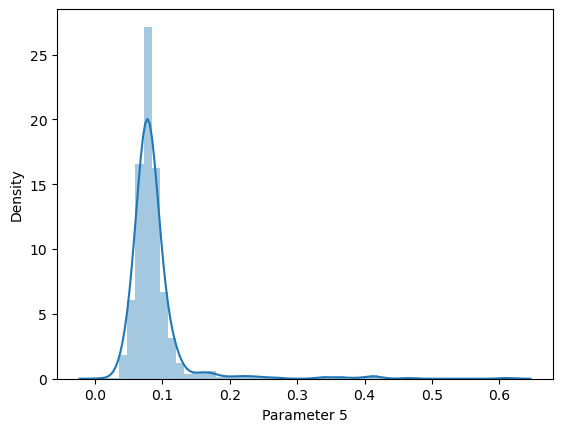

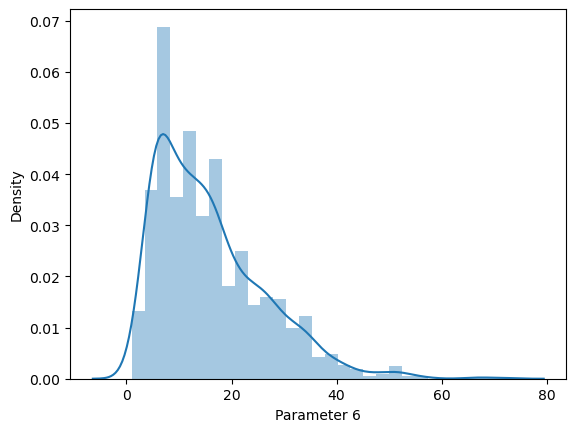

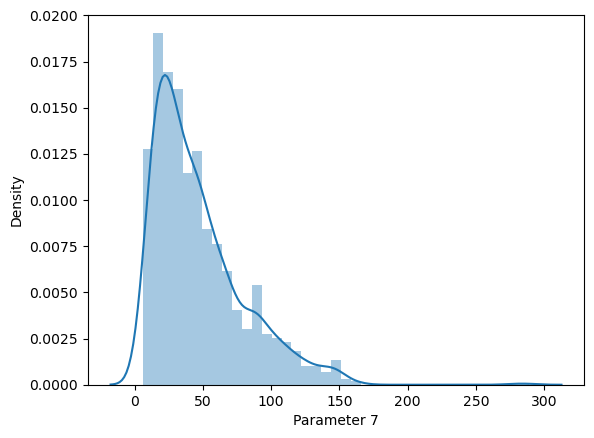

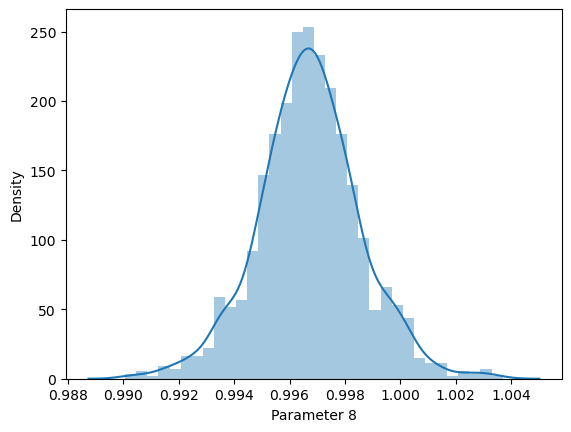

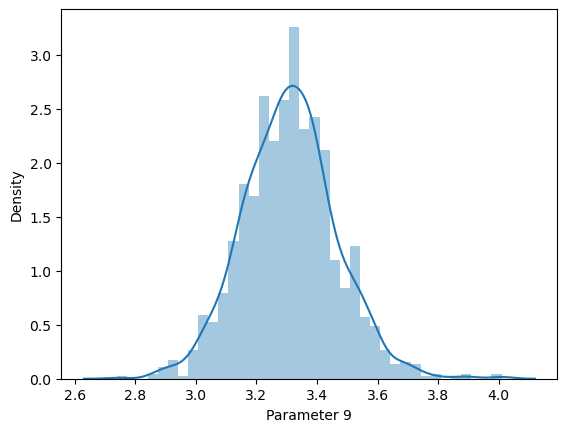

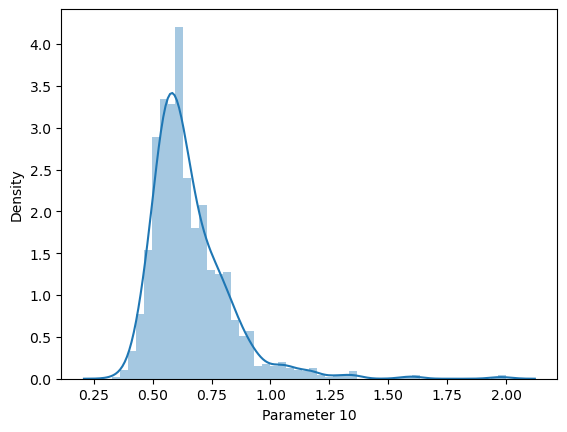

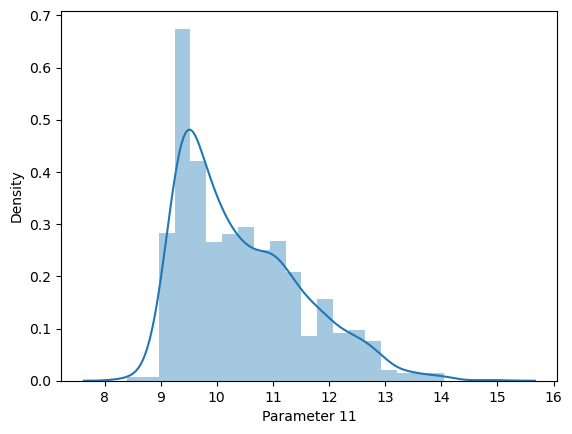

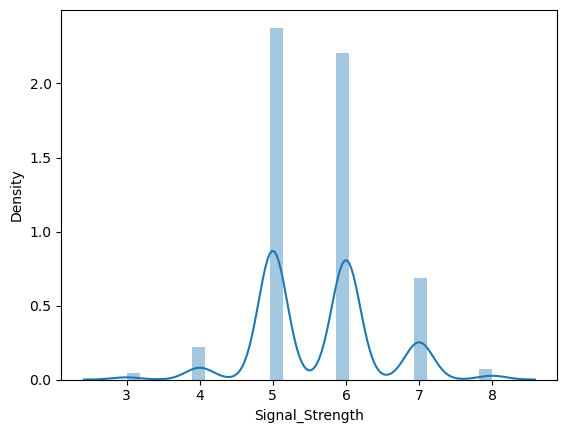

In [94]:
for i in range(0,len(signal_clean.columns)):
    sns.distplot(signal_clean[signal_clean.columns[i]])
    plt.show()
    print()

In [95]:
signal_clean.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [96]:
#sns.pairplot(signal_clean)

In [97]:
signal_clean.corr()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
Parameter 1,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
Parameter 2,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
Parameter 3,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
Parameter 4,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
Parameter 5,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
Parameter 6,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
Parameter 7,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
Parameter 8,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
Parameter 9,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
Parameter 10,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


# 2. Data preprocessing 


# A. Split the data into X & Y.

In [98]:
signal_clean['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

In [99]:
x=signal_clean.drop(['Signal_Strength'], axis=1)

In [100]:
y=signal_clean['Signal_Strength']

In [101]:
print(f'Shape of x : {x.shape} , Shape of y  : {y.shape}')

Shape of x : (1359, 11) , Shape of y  : (1359,)


In [102]:
x.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [103]:
y.nunique()

6

# B. Split the data into train & test with 70:30 proportion.

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


# Include 'Stratify'  #RD 
'''
For example, if variable y is a binary categorical variable with values 0 and 1 
and there are 25% of zeros and 75% of ones, stratify=y will make sure that 
your random split has 25% of 0's and 75% of 1's.'''

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.30,
                                                    random_state=42,
                                                    stratify=y    # RD : Dont forget to add this 
                                                   )

In [105]:
y_train.shape

(951,)

In [106]:
y_test.shape

(408,)

# C. Print shape of all the 4 variables and verify if train and test data is in sync. 


In [107]:
print('x_train Shape :', x_train.shape)
print()
print('x_test Shape :', x_test.shape)
print()
print('y_train Shape :', y_train.shape)
print()
print('y_test Shape :', y_test.shape)  

x_train Shape : (951, 11)

x_test Shape : (408, 11)

y_train Shape : (951,)

y_test Shape : (408,)


# D. Normalise the train and test data with appropriate method. 


In [108]:
from sklearn.preprocessing import StandardScaler

# Scaling training data
x_train = StandardScaler().fit_transform(x_train)   

# Scaling testing data
x_test = StandardScaler().fit_transform(x_test)  

# E. Transform Labels into format acceptable by Neural Network

In [109]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)     
y_test = to_categorical(y_test)

In [110]:
y_train.shape

(951, 9)

In [111]:
y_test.shape

(408, 9)

# 3. Model Training & Evaluation using Neural Network 
# A. Design a Neural Network to train a classifier. (Base Model)

In [112]:
model1 = Sequential()  

model1.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(x_train.shape[1],))) 
model1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(9, activation='softmax')) 

# Compile model

model1.compile(loss=losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy']) 


In [113]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 256)               3072      
                                                                 
 dense_24 (Dense)            (None, 64)                16448     
                                                                 
 dense_25 (Dense)            (None, 9)                 585       
                                                                 
Total params: 20105 (78.54 KB)
Trainable params: 20105 (78.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
model1.fit(x_train, y_train, epochs=100, verbose=2) # set verbose=0 to remove training updates

Epoch 1/100
30/30 - 0s - loss: 1.7234 - accuracy: 0.4164 - 102ms/epoch - 3ms/step
Epoch 2/100
30/30 - 0s - loss: 1.2044 - accuracy: 0.5499 - 11ms/epoch - 373us/step
Epoch 3/100
30/30 - 0s - loss: 1.1214 - accuracy: 0.5563 - 12ms/epoch - 402us/step
Epoch 4/100
30/30 - 0s - loss: 1.0780 - accuracy: 0.5647 - 9ms/epoch - 315us/step
Epoch 5/100
30/30 - 0s - loss: 1.0495 - accuracy: 0.5804 - 11ms/epoch - 378us/step
Epoch 6/100
30/30 - 0s - loss: 1.0279 - accuracy: 0.5773 - 11ms/epoch - 378us/step
Epoch 7/100
30/30 - 0s - loss: 1.0101 - accuracy: 0.5910 - 10ms/epoch - 335us/step
Epoch 8/100
30/30 - 0s - loss: 0.9919 - accuracy: 0.5941 - 10ms/epoch - 318us/step
Epoch 9/100
30/30 - 0s - loss: 0.9873 - accuracy: 0.5878 - 10ms/epoch - 350us/step
Epoch 10/100
30/30 - 0s - loss: 0.9735 - accuracy: 0.6004 - 11ms/epoch - 374us/step
Epoch 11/100
30/30 - 0s - loss: 0.9662 - accuracy: 0.5899 - 11ms/epoch - 370us/step
Epoch 12/100
30/30 - 0s - loss: 0.9523 - accuracy: 0.6088 - 10ms/epoch - 344us/step
Epo

Epoch 99/100
30/30 - 0s - loss: 0.6411 - accuracy: 0.7319 - 12ms/epoch - 387us/step
Epoch 100/100
30/30 - 0s - loss: 0.6385 - accuracy: 0.7371 - 11ms/epoch - 355us/step


In [115]:
result=model1.evaluate(x_test, y_test) 

13/13 [==============================] - 0s 451us/step - loss: 1.0935 - accuracy: 0.5564


In [116]:
result[1]

0.5563725233078003

# B. Train the classifier using previously designed Architecture 

# Model-2

In [117]:
import pandas
from keras.models import Sequential
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
tf.keras.layers.BatchNormalization
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization

In [118]:
# Set random seed

tf.random.set_seed(42)   

model2 = Sequential()
model2.add(Dense(200,activation='relu',input_dim = 11 ))
model2.add(Dropout(0.3))

model2.add(BatchNormalization())
model2.add(Dense(150, activation='relu'))
model2.add(Dropout(0.3))

model2.add(BatchNormalization())
model2.add(Dense(110, activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(9, activation = 'softmax'))

# 2. Compile the model
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=optimizers.Adam(lr=1e-3),
                metrics=['accuracy'])

model2.summary()


# 3. Fit the model
model2.fit(x_train, y_train, epochs=50, verbose=1)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 200)               2400      
                                                                 
 dropout_12 (Dropout)        (None, 200)               0         
                                                                 
 batch_normalization_8 (Bat  (None, 200)               800       
 chNormalization)                                                
                                                                 
 dense_27 (Dense)            (None, 150)               30150     
                                                                 
 dropout_13 (Dropout)        (None, 150)               0         
                                                                 
 batch_normalization_9 (Bat  (None, 150)               600       
 chNormalization)                                     

In [119]:
# Evaluate the model
result2=model2.evaluate(x_test, y_test)

13/13 [==============================] - 0s 544us/step - loss: 1.0067 - accuracy: 0.5809


In [120]:
result2[1]

0.5808823704719543

# C. Plot 2 separate visuals. 
# i. Training Loss and Validation Loss

In [121]:
history1 = model2.fit(x_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
12/12 [==============================] - 0s 3ms/step - loss: 0.7743 - accuracy: 0.6697 - val_loss: 0.6700 - val_accuracy: 0.7277
Epoch 2/50
12/12 [==============================] - 0s 2ms/step - loss: 0.7828 - accuracy: 0.6434 - val_loss: 0.6810 - val_accuracy: 0.7173
Epoch 3/50
12/12 [==============================] - 0s 2ms/step - loss: 0.7496 - accuracy: 0.6789 - val_loss: 0.6862 - val_accuracy: 0.7225
Epoch 4/50
12/12 [==============================] - 0s 2ms/step - loss: 0.7713 - accuracy: 0.6592 - val_loss: 0.6933 - val_accuracy: 0.7173
Epoch 5/50
12/12 [==============================] - 0s 2ms/step - loss: 0.7604 - accuracy: 0.6592 - val_loss: 0.7031 - val_accuracy: 0.7120
Epoch 6/50
12/12 [==============================] - 0s 2ms/step - loss: 0.7345 - accuracy: 0.6526 - val_loss: 0.7103 - val_accuracy: 0.7173
Epoch 7/50
12/12 [==============================] - 0s 2ms/step - loss: 0.7382 - accuracy: 0.6789 - val_loss: 0.7180 - val_accuracy: 0.7068
Epoch 8/50
12/12 [==

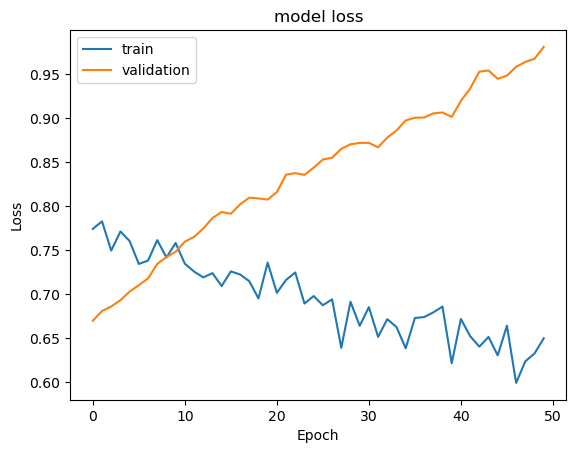

In [122]:
#Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [123]:
# From the above plot, we observe that there is more 'noise' in the 
# training behavior of the model,compared to validation model.

# ii. Training Accuracy and Validation Accuracy

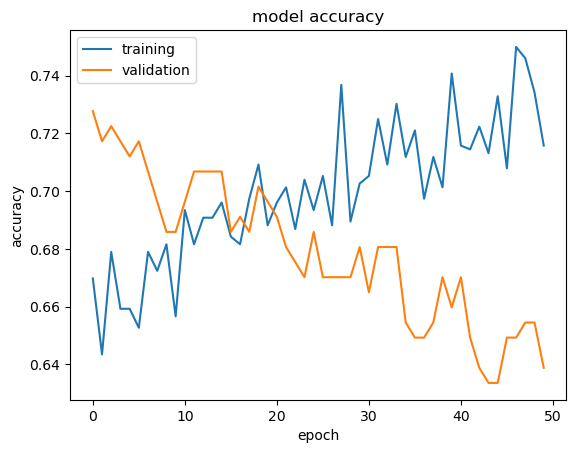

In [124]:
loss, accuracy  = model2.evaluate(x_test, y_test, verbose=False)
    
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [125]:
# From the above plot, we observe that there is hugh 'noise' in both
# training behavior of the model,and validation model.
# comparatively validation model is less noiser.

# D. Design new architecture/update existing architecture in attempt to improve the performance of the model. 

# Model-3

In [126]:
tf.keras.layers.BatchNormalization

keras.src.layers.normalization.batch_normalization.BatchNormalization

In [127]:
# Set random seed
tf.random.set_seed(42)

model3 = Sequential()
model3.add(Dense(50,activation='relu',input_dim = 11 ))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(30,activation='relu',kernel_initializer='he_uniform'))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(12,activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(9, activation = 'softmax'))

# 2. Compile the model
model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model3.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
30/30 [==============================] - 0s 651us/step - loss: 2.3211 - accuracy: 0.2166
Epoch 2/100
30/30 [==============================] - 0s 631us/step - loss: 1.8555 - accuracy: 0.3733
Epoch 3/100
30/30 [==============================] - 0s 571us/step - loss: 1.6330 - accuracy: 0.4437
Epoch 4/100
30/30 [==============================] - 0s 432us/step - loss: 1.5024 - accuracy: 0.4900
Epoch 5/100
30/30 [==============================] - 0s 424us/step - loss: 1.3775 - accuracy: 0.5279
Epoch 6/100
30/30 [==============================] - 0s 458us/step - loss: 1.3346 - accuracy: 0.5142
Epoch 7/100
30/30 [==============================] - 0s 447us/step - loss: 1.2774 - accuracy: 0.5394
Epoch 8/100
30/30 [==============================] - 0s 475us/step - loss: 1.2582 - accuracy: 0.5415
Epoch 9/100
30/30 [==============================] - 0s 439us/step - loss: 1.2184 - accuracy: 0.5331
Epoch 10/100
30/30 [==============================] - 0s 442us/step - loss: 1.1819 - accura

In [128]:
# Evaluate the model
result3=model3.evaluate(x_test, y_test)

13/13 [==============================] - 0s 504us/step - loss: 0.9319 - accuracy: 0.6103


In [129]:
result3[1]

0.6102941036224365

In [130]:
# Previous model had accuracy of 58.2% but this model has 61.2%

In [131]:
history2 = model3.fit(x_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
12/12 [==============================] - 0s 2ms/step - loss: 0.9272 - accuracy: 0.6026 - val_loss: 0.8892 - val_accuracy: 0.6492
Epoch 2/50
12/12 [==============================] - 0s 1ms/step - loss: 0.9130 - accuracy: 0.6079 - val_loss: 0.8905 - val_accuracy: 0.6492
Epoch 3/50
12/12 [==============================] - 0s 1ms/step - loss: 0.9299 - accuracy: 0.5921 - val_loss: 0.8922 - val_accuracy: 0.6492
Epoch 4/50
12/12 [==============================] - 0s 1ms/step - loss: 0.9439 - accuracy: 0.6000 - val_loss: 0.8931 - val_accuracy: 0.6440
Epoch 5/50
12/12 [==============================] - 0s 1ms/step - loss: 0.9045 - accuracy: 0.6237 - val_loss: 0.8938 - val_accuracy: 0.6440
Epoch 6/50
12/12 [==============================] - 0s 1ms/step - loss: 0.9312 - accuracy: 0.5842 - val_loss: 0.8936 - val_accuracy: 0.6440
Epoch 7/50
12/12 [==============================] - 0s 1ms/step - loss: 0.9058 - accuracy: 0.6066 - val_loss: 0.8951 - val_accuracy: 0.6492
Epoch 8/50
12/12 [==

# E. Plot visuals as in Q3.C and share insights about difference observed in both the models.

# Plotting Train Loss vs Validation Loss

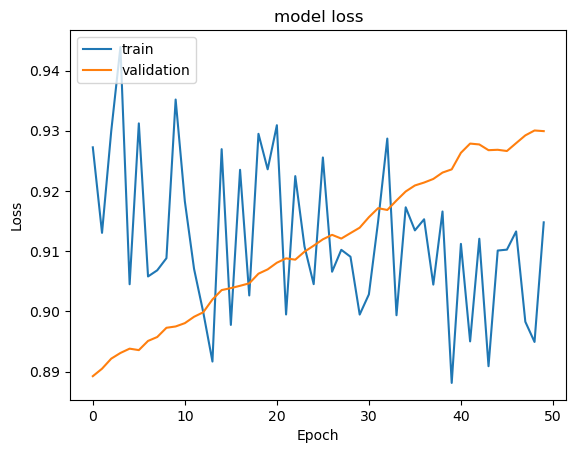

In [132]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [133]:
# From the above plot, we observe that there is more 'noise' in the 
# training behavior of the model,compared to validation model.
# and validation model curve is more smoother but less steaper compared to previous model.

# Validation Accuracy vs Training Accuracy

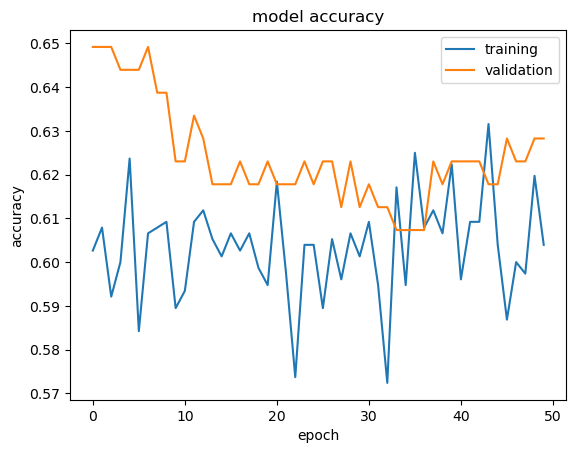

In [134]:
loss, accuracy  = model3.evaluate(x_test, y_test, verbose=False)
    
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [135]:
# From the above plot, we observe that there is hugh 'noise' in both
# training behavior of the model,and validation model.
# comparatively validation model is less noiser.
# Compared to previous model both training and validation model has hugh noise.

# Project-2

In [136]:
import numpy as np
import pandas as pd
import h5py     
import seaborn as sns 
from sklearn import preprocessing
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization

# 1. Data Import and Exploration 
# A. Read the .h5 file and assign to a variable.

In [137]:
import h5py

In [138]:
df = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

# Multi-level classification (data used for classification : Images)

In [139]:
print (np.unique(y_train))
len(np.unique(y_train))

[0. 1.]


2

# B. Print all the keys from the .h5 file.

In [140]:
list(df.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [141]:
# Datatypes of all keys

for i in list(df.keys()):
    print(i,df[i].dtype)

X_test float32
X_train float32
X_val float32
y_test uint8
y_train uint8
y_val uint8


In [142]:
x_test = df['X_test']

x_train = df['X_train']

x_val = df['X_val']

y_test = df['y_test']

y_train = df['y_train']

y_val=df['y_val']

print('x_val Shape :', x_val.shape)
print()
print('y_val Shape :', y_val.shape)
print()
print('x_train Shape :', x_train.shape)
print()
print('x_test Shape :', x_test.shape)
print()
print('y_train Shape :', y_train.shape)
print()
print('y_test Shape :', y_test.shape)

x_val Shape : (60000, 32, 32)

y_val Shape : (60000,)

x_train Shape : (42000, 32, 32)

x_test Shape : (18000, 32, 32)

y_train Shape : (42000,)

y_test Shape : (18000,)


# C. Split the data into X_train, X_test, Y_train, Y_test 

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# RD use Stratify 

# 2. Data Visualisation and preprocessing
# A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [144]:
x_test = df['X_test']

x_train = df['X_train']

x_val = df['X_val']

y_test = df['y_test']

y_train = df['y_train']

y_val=df['y_val']

print('x_val Shape :', x_val.shape)
print()
print('y_val Shape :', y_val.shape)
print()
print('x_train Shape :', x_train.shape)
print()
print('x_test Shape :', x_test.shape)
print()
print('y_train Shape :', y_train.shape)
print()
print('y_test Shape :', y_test.shape)

x_val Shape : (60000, 32, 32)

y_val Shape : (60000,)

x_train Shape : (42000, 32, 32)

x_test Shape : (18000, 32, 32)

y_train Shape : (42000,)

y_test Shape : (18000,)


# B. Visualise first 10 images in train data and print its corresponding labels.

Label:  2


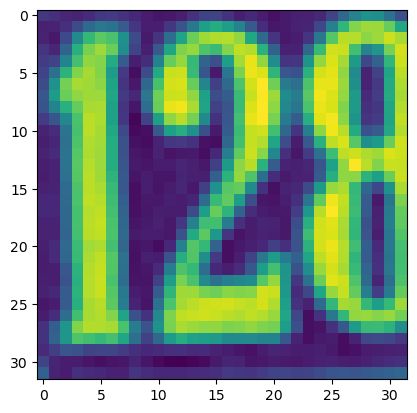

Label:  6


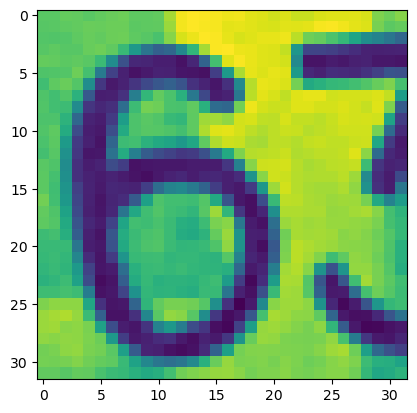

Label:  7


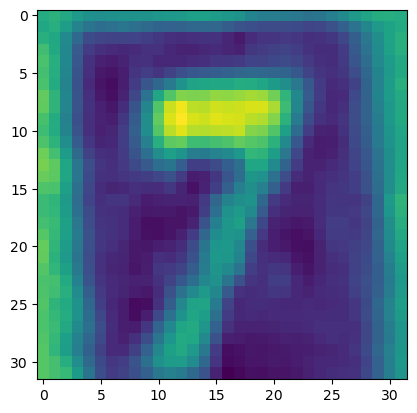

Label:  4


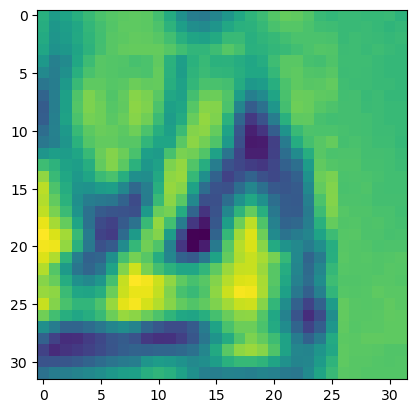

Label:  4


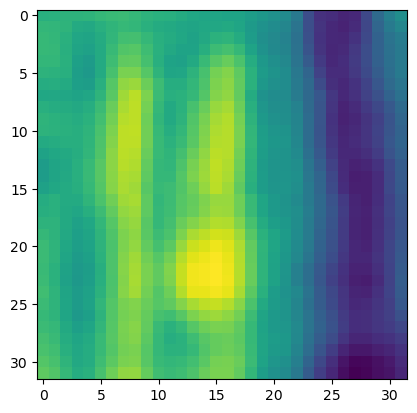

Label:  0


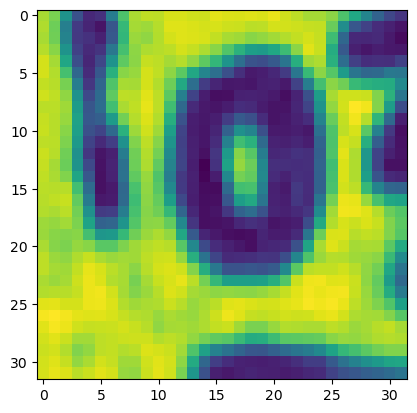

Label:  3


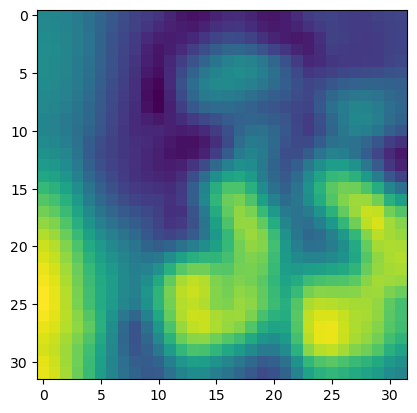

Label:  0


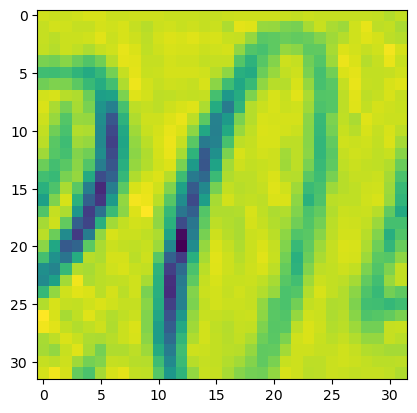

Label:  7


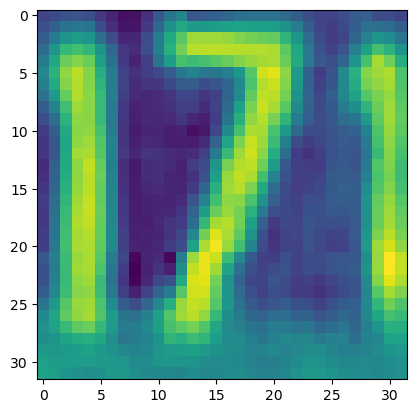

Label:  3


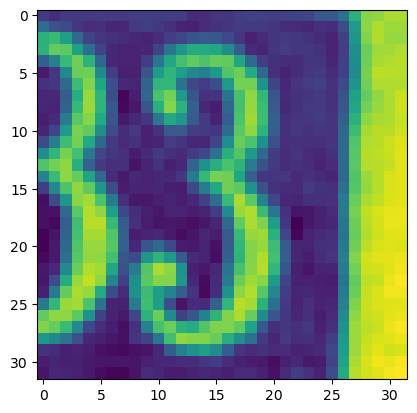

In [145]:
def viz(ss):
    
    plt.imshow(x_train[ss])
    print('Label: ', y_train[ss])
    plt.show()
    
for ss in range(0,10):
    viz(ss) 

# C. Reshape all the images with appropriate shape update the data in same variable. 

In [146]:
#Reshape data from 2D to 1D -> 32X32 to 1024

x_train = np.asarray(x_train).reshape(42000,1024)
x_test = np.asarray(x_test).reshape(18000,1024)      #RD??  
x_val = np.asarray(x_val).reshape(60000,1024)

In [147]:
x_train[0]

array([33.0704, 30.2601, 26.852 , ..., 49.6682, 50.853 , 53.0377],
      dtype=float32)

# # D. Normalise the images i.e. Normalise the pixel values.

In [148]:

x_train = x_train / 255.0  #RD??
x_test = x_test / 255.0


In [149]:
print('Training set', x_train.shape, y_train.shape)
print('Test set', x_test.shape, y_test.shape)

Training set (42000, 1024) (42000,)
Test set (18000, 1024) (18000,)


# E. Transform Labels into format acceptable by Neural Network 

In [150]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)  
y_test_cat=to_categorical(y_test,num_classes)

In [151]:
print(y_train[0])
print()
print(len(np.unique(y_train)))

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

2


In [152]:
print(y_test_cat[0])
print()
print(len(np.unique(y_test_cat)))

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

2


# F. Print total Number of classes in the Dataset.

In [153]:
print (np.unique(y_train))
len(np.unique(y_train))

[0. 1.]


2

# 3. Model Training & Evaluation using Neural Network 

# A. Design a Neural Network to train a classifier. 


# Model-1 ( Base Model)

In [154]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

image_size=32*32

# create model
model1 = Sequential()  

model1.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,))) 
model1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))

model1.add(Dense(num_classes, activation='softmax')) 
### For multiclass classification 'Softmax' is used 

In [155]:
# Compile model

adam = optimizers.Adam(lr=1e-3)
model1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) 

In [257]:
## Looking into our base model
model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 256)               262400    
                                                                 
 dense_59 (Dense)            (None, 64)                16448     
                                                                 
 dense_60 (Dense)            (None, 64)                4160      
                                                                 
 dense_61 (Dense)            (None, 10)                650       
                                                                 
Total params: 283658 (1.08 MB)
Trainable params: 283658 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [156]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [157]:
# Fit the model
history1=model1.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=2,callbacks=callbacks)

Epoch 1/10

Epoch 1: saving model to model_weights.h5
263/263 - 1s - loss: 2.2574 - accuracy: 0.1440 - val_loss: 2.0431 - val_accuracy: 0.2607 - lr: 0.0010 - 553ms/epoch - 2ms/step
Epoch 2/10

Epoch 2: saving model to model_weights.h5
263/263 - 0s - loss: 1.8542 - accuracy: 0.3439 - val_loss: 1.6045 - val_accuracy: 0.4576 - lr: 0.0010 - 416ms/epoch - 2ms/step
Epoch 3/10

Epoch 3: saving model to model_weights.h5
263/263 - 0s - loss: 1.4451 - accuracy: 0.5191 - val_loss: 1.3533 - val_accuracy: 0.5579 - lr: 0.0010 - 426ms/epoch - 2ms/step
Epoch 4/10

Epoch 4: saving model to model_weights.h5
263/263 - 0s - loss: 1.2889 - accuracy: 0.5790 - val_loss: 1.2680 - val_accuracy: 0.5962 - lr: 0.0010 - 414ms/epoch - 2ms/step
Epoch 5/10

Epoch 5: saving model to model_weights.h5
263/263 - 0s - loss: 1.1876 - accuracy: 0.6205 - val_loss: 1.1405 - val_accuracy: 0.6498 - lr: 0.0010 - 412ms/epoch - 2ms/step
Epoch 6/10

Epoch 6: saving model to model_weights.h5
263/263 - 0s - loss: 1.1238 - accuracy: 0

In [158]:
y_pred1=model1.predict(x_test)

563/563 [==============================] - 0s 374us/step


In [159]:
(y_pred1[0]) 

array([0.4301603 , 0.03618481, 0.08904821, 0.03577771, 0.0445849 ,
       0.07381614, 0.09323529, 0.01381767, 0.11089041, 0.07248444],
      dtype=float32)

In [160]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final1=[]
for i in y_pred1:
        y_pred_final1.append(np.argmax(i))


In [161]:
y_pred_final1[0]

0

In [162]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final1))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70      1814
           1       0.64      0.80      0.71      1828
           2       0.78      0.75      0.77      1803
           3       0.68      0.65      0.66      1719
           4       0.74      0.79      0.77      1812
           5       0.65      0.64      0.64      1768
           6       0.72      0.67      0.70      1832
           7       0.76      0.75      0.75      1808
           8       0.71      0.62      0.66      1812
           9       0.76      0.62      0.68      1804

    accuracy                           0.70     18000
   macro avg       0.71      0.70      0.70     18000
weighted avg       0.71      0.70      0.70     18000



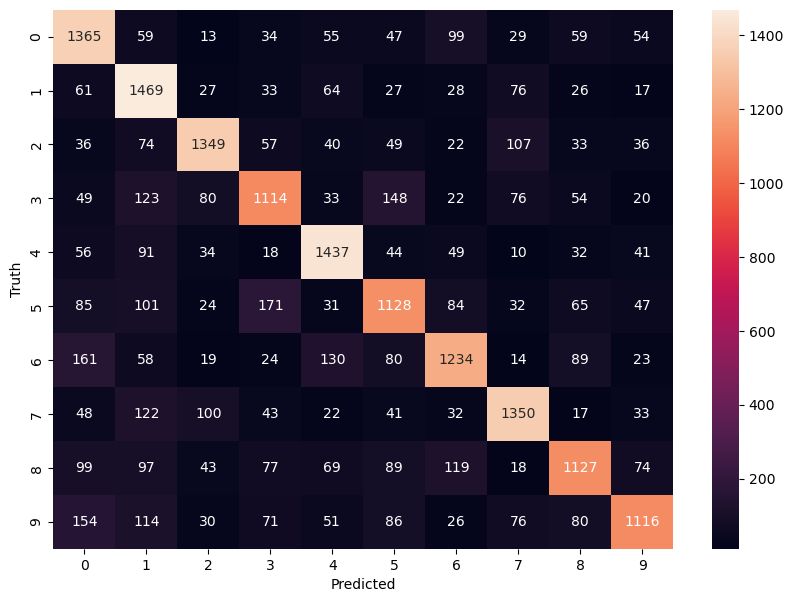

In [163]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_final1)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [266]:
# Observation : 
# From the above confusion matrix we can see that our model is 
# Struggling to identify the number'3','4','5' and '7', but it is identifing it as '2'
# same case with '3' and '9' it is identifying it as '5', '2' respectively.
# Using 'Data augumentation' we can train our model, for the numbers '3','7' and '4' 
# to increase the accuracy of the same. 

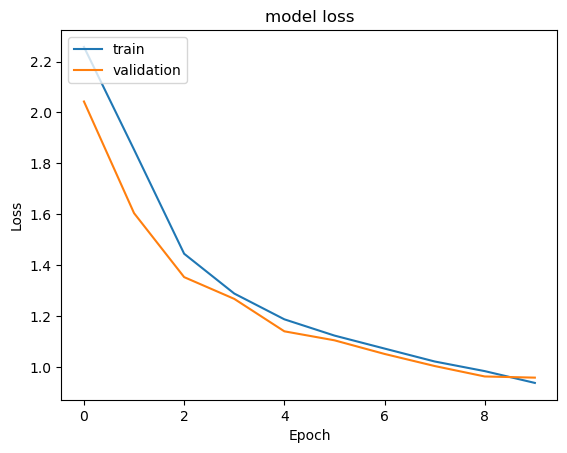

In [164]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [165]:
# From the above graph we can see that, intially both training and validation losses 
# exponentially dropped . But the validation loss increased a bit between 5 to 7 epoch, 
# while the training data loss continuously decreased.
# Between 7 to 9 epoch the validation data almost became equal to training data, 
# but at the end losses for validation became more comapred to training data. 

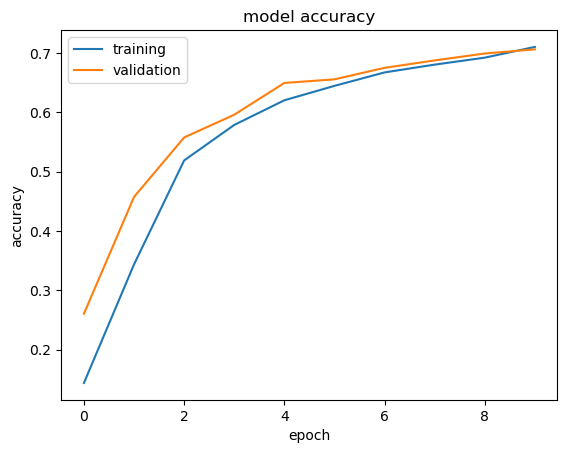

In [166]:
# Training Accuracy vs Model Accuracy

loss, accuracy  = model1.evaluate(x_test, y_test_cat, verbose=False)
    
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [167]:
# From the above graph we can deduce that both the training and validation accuracy 
# increased continusly for a while (till 5th epoch) then , the accuracy of validation data 
# decreased i.e came below the training accuracy and again it increased became almost equal to
# accuracy of training accuracy.

# Model 2 ( Using  'Batch-Normalization' & 'Drop-out' )

In [168]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

image_size=32*32

# create model
model2 = Sequential()  

model2.add(Dense(500, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(400, activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(300, activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(num_classes, activation='softmax')) 



In [169]:
# Compile model
#RMS_prop=optimizers.RMSprop()   
adam = optimizers.Adam(lr=1e-3)
model2.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) 

In [170]:
## Looking into our base model
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 500)               512500    
                                                                 
 batch_normalization_12 (Ba  (None, 500)               2000      
 tchNormalization)                                               
                                                                 
 dropout_17 (Dropout)        (None, 500)               0         
                                                                 
 dense_39 (Dense)            (None, 400)               200400    
                                                                 
 batch_normalization_13 (Ba  (None, 400)               1600      
 tchNormalization)                                               
                                                                 
 dropout_18 (Dropout)        (None, 400)             

In [171]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=2)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [172]:
# Fit the model
history2=model2.fit(x_train, y_train, validation_split=0.2, epochs=60, batch_size=128, verbose=2,callbacks=callbacks)


Epoch 1/60

Epoch 1: saving model to model_weights.h5
263/263 - 1s - loss: 1.6575 - accuracy: 0.4549 - val_loss: 2.3216 - val_accuracy: 0.2694 - lr: 0.0010 - 1s/epoch - 5ms/step
Epoch 2/60

Epoch 2: saving model to model_weights.h5
263/263 - 1s - loss: 1.2137 - accuracy: 0.6085 - val_loss: 2.0667 - val_accuracy: 0.3762 - lr: 0.0010 - 1s/epoch - 5ms/step
Epoch 3/60

Epoch 3: saving model to model_weights.h5
263/263 - 1s - loss: 1.1284 - accuracy: 0.6374 - val_loss: 1.3676 - val_accuracy: 0.5763 - lr: 0.0010 - 1s/epoch - 5ms/step
Epoch 4/60

Epoch 4: saving model to model_weights.h5
263/263 - 1s - loss: 1.0217 - accuracy: 0.6744 - val_loss: 1.0259 - val_accuracy: 0.6704 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 5/60

Epoch 5: saving model to model_weights.h5
263/263 - 1s - loss: 0.9624 - accuracy: 0.6961 - val_loss: 1.1179 - val_accuracy: 0.6346 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 6/60

Epoch 6: saving model to model_weights.h5
263/263 - 1s - loss: 0.9259 - accuracy: 0.7076 - val_los

Epoch 46/60

Epoch 46: saving model to model_weights.h5
263/263 - 1s - loss: 0.6938 - accuracy: 0.7831 - val_loss: 0.6064 - val_accuracy: 0.8164 - lr: 1.0000e-05 - 1s/epoch - 5ms/step
Epoch 47/60

Epoch 47: saving model to model_weights.h5
263/263 - 1s - loss: 0.6902 - accuracy: 0.7832 - val_loss: 0.6071 - val_accuracy: 0.8175 - lr: 1.0000e-05 - 1s/epoch - 5ms/step
Epoch 48/60

Epoch 48: saving model to model_weights.h5
263/263 - 1s - loss: 0.6881 - accuracy: 0.7831 - val_loss: 0.6056 - val_accuracy: 0.8158 - lr: 1.0000e-05 - 1s/epoch - 5ms/step
Epoch 49/60

Epoch 49: saving model to model_weights.h5
263/263 - 1s - loss: 0.6914 - accuracy: 0.7838 - val_loss: 0.6051 - val_accuracy: 0.8173 - lr: 1.0000e-05 - 1s/epoch - 5ms/step
Epoch 50/60

Epoch 50: saving model to model_weights.h5
263/263 - 1s - loss: 0.6958 - accuracy: 0.7804 - val_loss: 0.6046 - val_accuracy: 0.8144 - lr: 1.0000e-05 - 1s/epoch - 5ms/step
Epoch 51/60

Epoch 51: saving model to model_weights.h5
263/263 - 1s - loss: 0.6

In [173]:
y_pred2=model2.predict(x_test)

(y_pred2[0]) 

563/563 [==============================] - 0s 774us/step


array([0.2293735 , 0.22498833, 0.12570262, 0.03402599, 0.06342585,
       0.01667931, 0.06184076, 0.06972215, 0.11728576, 0.05695573],
      dtype=float32)

In [174]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final2=[]
for i in y_pred2:
        y_pred_final2.append(np.argmax(i))
y_pred_final2[0]

0

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1814
           1       0.78      0.86      0.82      1828
           2       0.85      0.82      0.83      1803
           3       0.80      0.76      0.78      1719
           4       0.84      0.85      0.84      1812
           5       0.78      0.81      0.80      1768
           6       0.82      0.81      0.82      1832
           7       0.83      0.85      0.84      1808
           8       0.82      0.76      0.79      1812
           9       0.81      0.79      0.80      1804

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000



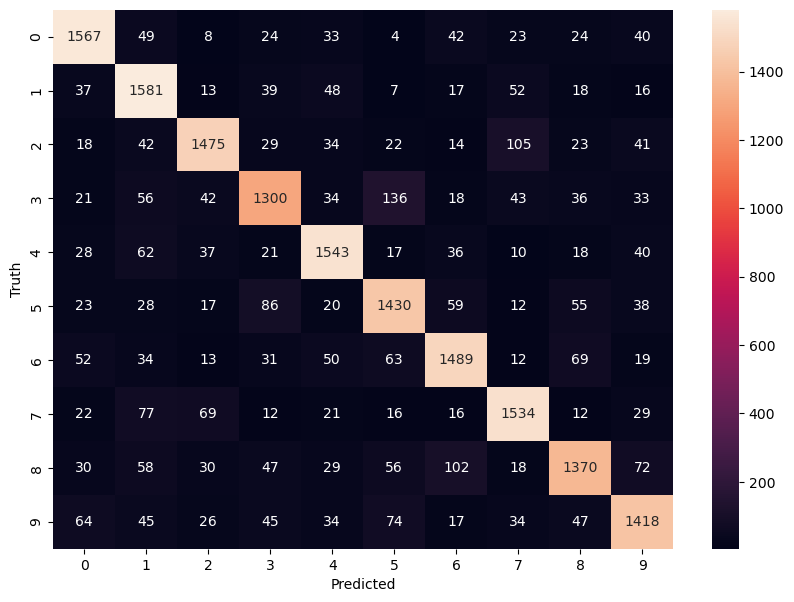

In [175]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final2))

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_final2)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [176]:
# Accuracy is : 82%

# B. Train the classifier using previously designed Architecture (Use best suitable parameters)


# Model-3 ( Only With Batch-Normalization)

In [177]:
# define model

from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

image_size=32*32

# create model
model3 = Sequential()  

model3.add(Dense(500, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model3.add(BatchNormalization())

                                
model3.add(Dense(400, activation='relu',kernel_initializer='he_uniform'))
model3.add(BatchNormalization()) 

model3.add(Dense(300, activation='relu',kernel_initializer='he_uniform')) 


model3.add(Dense(num_classes, activation='softmax')) ### For multiclass classification 'Softmax' is used 

In [178]:
# Compile model

adam = optimizers.Adam(lr=1e-3)
model3.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy']) 

### Loss function = Categorical cross entropy cos it is a multicalss classification problem.

In [179]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 500)               512500    
                                                                 
 batch_normalization_14 (Ba  (None, 500)               2000      
 tchNormalization)                                               
                                                                 
 dense_43 (Dense)            (None, 400)               200400    
                                                                 
 batch_normalization_15 (Ba  (None, 400)               1600      
 tchNormalization)                                               
                                                                 
 dense_44 (Dense)            (None, 300)               120300    
                                                                 
 dense_45 (Dense)            (None, 10)              

In [180]:
checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)

In [181]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [182]:
# Fit the model
history3=model3.fit(x_train, y_train, validation_split=0.2, epochs=48, batch_size=128, verbose=2,callbacks=callbacks)  #RD

Epoch 1/48

Epoch 1: saving model to model_weights.h5
263/263 - 1s - loss: 1.3506 - accuracy: 0.5648 - val_loss: 1.8166 - val_accuracy: 0.3824 - lr: 0.0010 - 1s/epoch - 6ms/step
Epoch 2/48

Epoch 2: saving model to model_weights.h5
263/263 - 1s - loss: 0.9226 - accuracy: 0.7118 - val_loss: 2.6066 - val_accuracy: 0.3362 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 3/48

Epoch 3: saving model to model_weights.h5
263/263 - 1s - loss: 0.7958 - accuracy: 0.7519 - val_loss: 1.7073 - val_accuracy: 0.4935 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 4/48

Epoch 4: saving model to model_weights.h5
263/263 - 1s - loss: 0.7058 - accuracy: 0.7823 - val_loss: 2.1821 - val_accuracy: 0.4306 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 5/48

Epoch 5: saving model to model_weights.h5
263/263 - 1s - loss: 0.6550 - accuracy: 0.7993 - val_loss: 1.1604 - val_accuracy: 0.6401 - lr: 0.0010 - 1s/epoch - 4ms/step
Epoch 6/48

Epoch 6: saving model to model_weights.h5
263/263 - 1s - loss: 0.5807 - accuracy: 0.8200 - val_los

Epoch 46/48

Epoch 46: saving model to model_weights.h5
263/263 - 1s - loss: 0.2729 - accuracy: 0.9196 - val_loss: 0.5203 - val_accuracy: 0.8555 - lr: 1.0000e-05 - 1s/epoch - 4ms/step
Epoch 47/48

Epoch 47: saving model to model_weights.h5
263/263 - 1s - loss: 0.2743 - accuracy: 0.9199 - val_loss: 0.5197 - val_accuracy: 0.8546 - lr: 1.0000e-05 - 1s/epoch - 4ms/step
Epoch 48/48

Epoch 48: saving model to model_weights.h5
263/263 - 1s - loss: 0.2740 - accuracy: 0.9191 - val_loss: 0.5208 - val_accuracy: 0.8543 - lr: 1.0000e-05 - 1s/epoch - 4ms/step


In [183]:
y_pred3=model3.predict(x_test)

(y_pred3[0]) 

563/563 [==============================] - 0s 755us/step


array([0.34341046, 0.22515519, 0.02399973, 0.00643294, 0.03979983,
       0.01741415, 0.13166317, 0.01086295, 0.17422278, 0.02703881],
      dtype=float32)

In [184]:
# As our outputs are probabilities so we will try to get the output class from these probablities by getting the maximum value
y_pred_final3=[]
for i in y_pred3:
    y_pred_final3.append(np.argmax(i))

In [185]:
y_pred_final3[0]

0

In [186]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final3))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1814
           1       0.85      0.88      0.86      1828
           2       0.88      0.86      0.87      1803
           3       0.81      0.81      0.81      1719
           4       0.88      0.88      0.88      1812
           5       0.82      0.85      0.84      1768
           6       0.85      0.84      0.84      1832
           7       0.88      0.89      0.89      1808
           8       0.85      0.81      0.83      1812
           9       0.84      0.83      0.83      1804

    accuracy                           0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000



In [187]:
# As we can see the 'accuracy' has increased from 82 % to 85% from last model.
# Have jsut increased the 'number of neurons' per layer,by keeping the number of layers constant.

# C. Evaluate performance of the model with appropriate metrics.


In [188]:
from sklearn.metrics import confusion_matrix

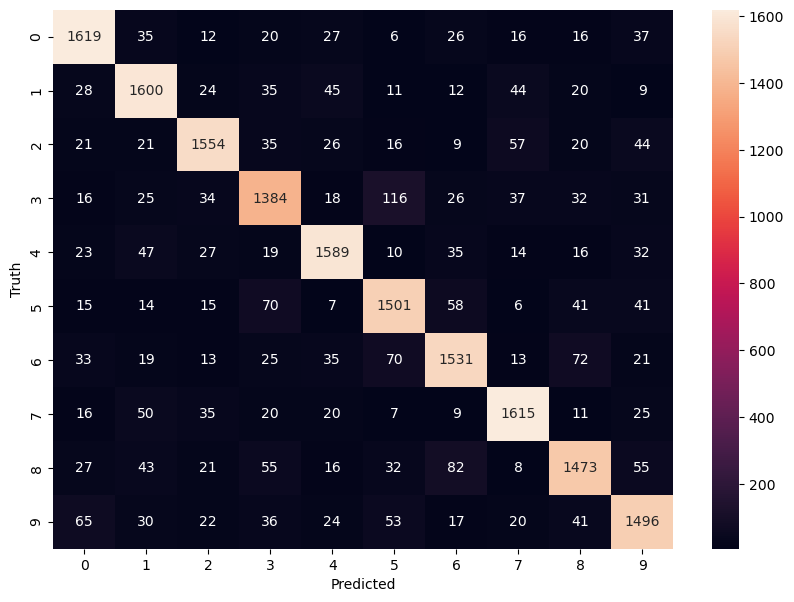

In [189]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm1=confusion_matrix(y_test,y_pred_final3)

plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [190]:
# Comapred to previous model which had accuracy of only 83% , But this model has a
# accuracy of 86% ,Which is totally reflecting in the above confusion matrix. 
# Last model(model) had trouble identifying the numbers 3,7,9, but this model(model1)
# has solved that problem if not completely, there is significant improvement.
# But still this model has problem identifying '3'. 

# D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

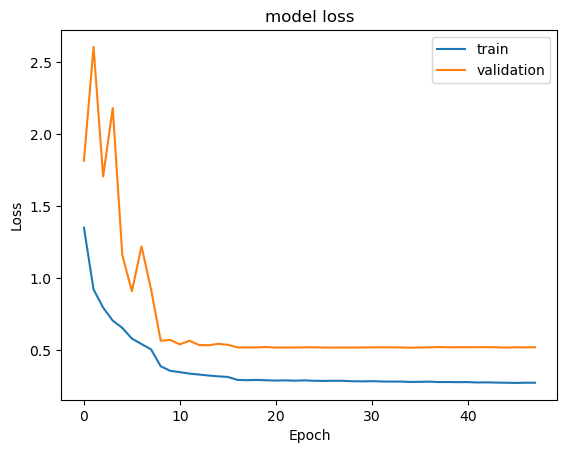

In [191]:
#Plotting Train Loss vs Validation Loss

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [192]:
# From the above graph we can see that, intially validation loss fluctuated then 
# took a steap dip & again fluctuated before it became almost constant.
# For training loss from the start itself it constantly redcued till epoch 10 then it became almost constant.

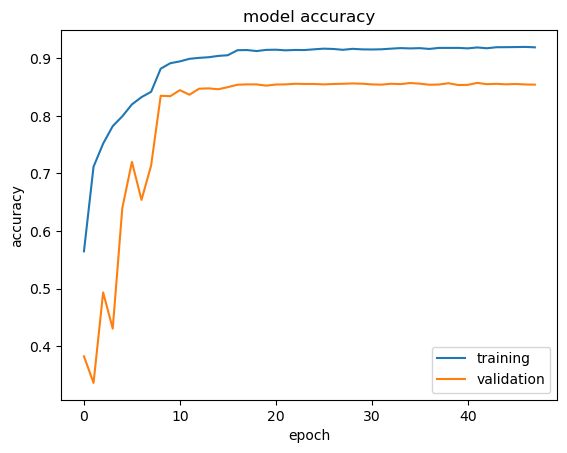

In [193]:
# Validation Accuracy vs Training Accuracy  

loss, accuracy  = model3.evaluate(x_test, y_test_cat, verbose=False)
    
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [194]:
# Initially the accuracy for validation data accuracy fluctuated.
# After epoch 13 both accuracies alomst followed constant accuracy.